In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [61]:
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


C:\Users\Anderson\AppData\Local\Temp\ipykernel_30092\2560186971.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [62]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 


# The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features



In [63]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [64]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [65]:
test_set.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,NaN,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.0,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.0,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,NaN,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


In [66]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

In [67]:
train_set_wprice=train_set.loc[:, train_set.columns!='Price']
print('{:15} {:>5} {:>5}'.format("Columns","Train","Test"))
for c in test_set.columns:
    print('{:15} {:>5} {:>5}'.format(c,train_set_wprice.nunique()[c], test_set.nunique()[c]))
    
## Review before to remove : Address, Postcode
## Consider new types in Test: Rooms, SellerG
## Review : Landsize, BuildingArea
## SellerG Target-Encode / Type One-Hot / Method One-Hot / Regionname One-Hot / Postcode Target-Encode / Address Edit Target-Encode

Columns         Train  Test
Suburb            292   304
Address          5400  8073
Rooms               8     9
Type                3     3
Method              5     5
SellerG           203   230
Date               58    57
Distance          194   195
Postcode          187   192
Bedroom2           11    11
Bathroom            9     9
Car                10    10
Landsize         1131  1239
BuildingArea      435   483
YearBuilt         121   131
CouncilArea        32    32
Lattitude        3568  4640
Longtitude       3790  4968
Regionname          8     8
Propertycount     289   301


In [68]:
## POSTCODE IS NOT NUMERIC, we should change it to categorica
train_set['Postcode'] = pd.Categorical(train_set.Postcode)

In [69]:
train_set.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [70]:
test_set.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000,8111.000000,8148.000000,4240.000000,4903.000000,8148.000000,8148.000000,8148.000000
mean,2.938513,10.082499,3104.467968,2.912985,1.531296,1.596721,572.657094,144.132764,1964.323679,-37.808895,144.995033,7465.003927
std,0.958331,5.781360,87.538551,0.950687,0.683228,0.948740,4993.979971,86.893702,37.950684,0.079193,0.102244,4385.255898
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,171.750000,93.000000,1940.000000,-37.856985,144.928845,4385.000000
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,431.500000,126.000000,1970.000000,-37.802110,145.000100,6567.000000
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,173.000000,1999.000000,-37.755880,145.057550,10331.000000
max,10.000000,47.300000,3977.000000,10.000000,8.000000,9.000000,433014.000000,1561.000000,2017.000000,-37.483810,145.470520,21650.000000


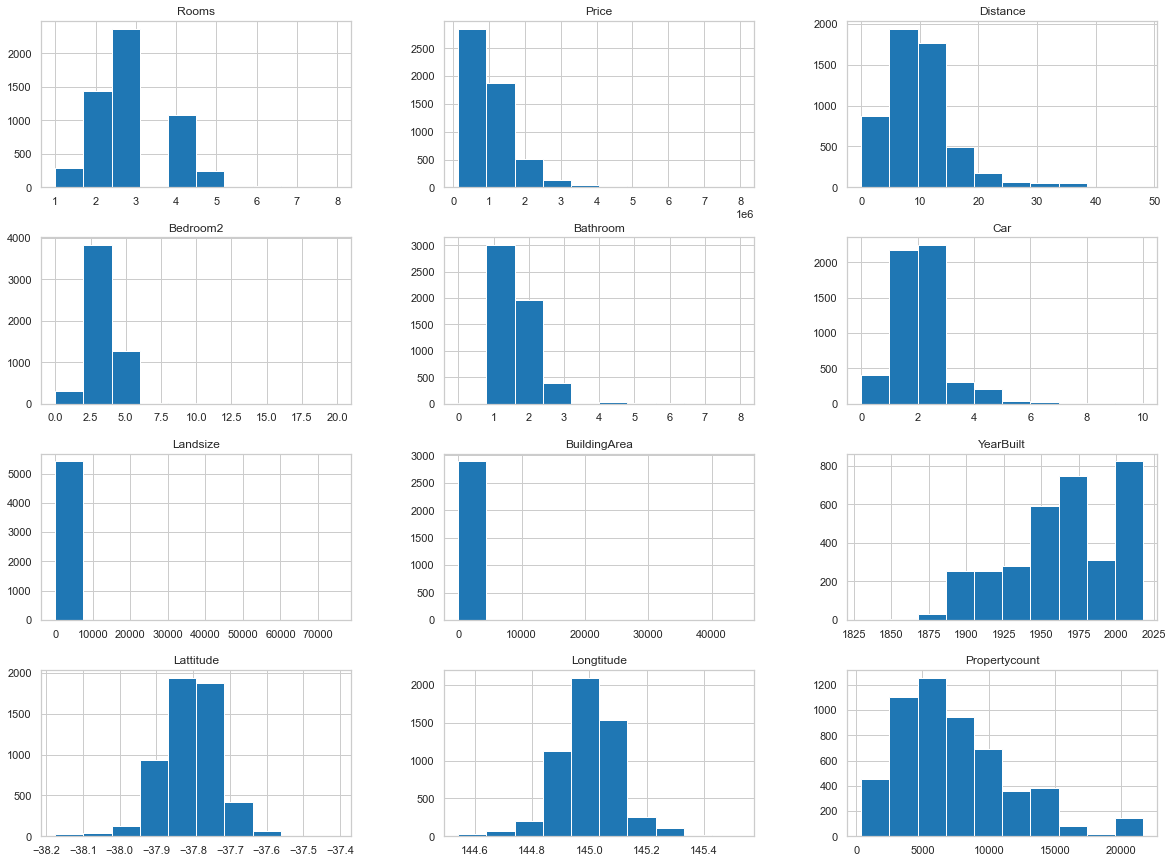

In [71]:
train_set.hist(bins=10, figsize=(20,15))
plt.show()

In [72]:
# Evaluate unique ID with Longtitude, Lattitude and Address when we want to predict the test data
# and see similar prices in the prediction

## create an id base on latitude and longitude
train_set["id"] = train_set["Longtitude"] * 1000 + train_set["Lattitude"]
train_set["id"] = train_set["id"].astype('str') + train_set["Address"]
test_set["id"] = test_set["Longtitude"] * 1000 + test_set["Lattitude"]
test_set["id"] = test_set["id"].astype('str') + test_set["Address"]

In [73]:
train_set.id.value_counts()

144805.9133000000114 Baker St      2
145046.6976822 Keith St            2
144952.975577/129 Hoddle St        2
144851.896738 Lily St              2
144923.3531999999881 Carter St     2
                                  ..
144918.0592000000232A Kelson St    1
144987.270830 Studley Rd           1
144952.84350000002126 Smith St     1
145081.9246100000515 Byron St      1
144830.208831 Napoleon St          1
Name: id, Length: 5420, dtype: int64

In [74]:
train_set[train_set.id=="144805.9133000000114 Baker St"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
index,,,,,,,,,,,,,,,,,,,,,,
886,Sunshine,14 Baker St,4,h,760000.0,S,Douglas,8/04/2017,12.6,3020.0,4.0,1.0,5.0,650.0,NaN,NaN,Brimbank,-37.7867,144.8437,Western Metropolitan,3755.0,144805.9133000000114 Baker St
4957,Sunshine,14 Baker St,4,h,700000.0,PI,Douglas,30/07/2016,12.6,3020.0,4.0,1.0,5.0,650.0,NaN,NaN,Brimbank,-37.7867,144.8437,Western Metropolitan,3755.0,144805.9133000000114 Baker St


In [75]:
test_set.id.value_counts()

144830.790999999971/12 Hatfield Ct     2
144929.9053 Brian St                   2
144973.7416172 Rossmoyne St            2
144996.797600000022/27 Pakington St    2
144992.236419 Gordon Gr                2
                                      ..
145036.971733 Surf St                  1
144942.922553 Addison St               1
145164.783470000052/61 Orient Av       1
145071.837117 Parkhill Dr              1
144806.11178 High St                   1
Name: id, Length: 8119, dtype: int64

## Discover and visualize the data to gain insights

In [76]:
train_set[["Rooms","Bedroom2"]].value_counts()
#Rooms, Bedroom2
#YearBuilt >2022
# Bedroom2 >19
# Evaluate ID

Rooms  Bedroom2
3      3.0         2254
2      2.0         1388
4      4.0          996
1      1.0          280
5      5.0          221
                   ... 
6      4.0            1
7      5.0            1
1      3.0            1
8      6.0            1
       8.0            1
Length: 34, dtype: int64

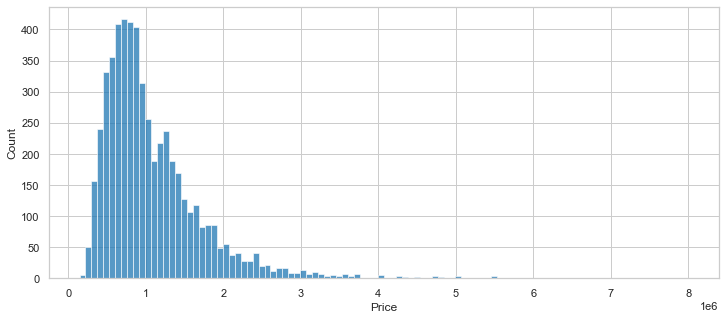

In [77]:
sns.histplot(train_set["Price"])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


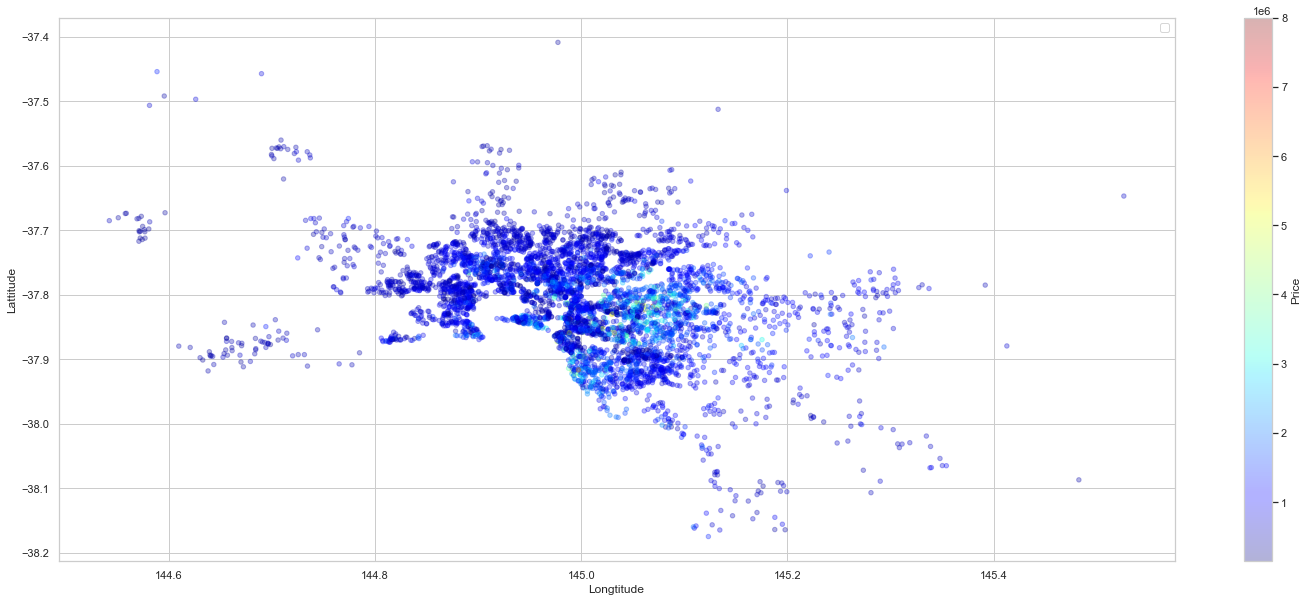

In [78]:
train_set.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [79]:
corr_matrix = train_set.corr()

In [80]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.494941
Bedroom2         0.460544
Bathroom         0.459137
Car              0.227902
Longtitude       0.199303
BuildingArea     0.061963
Landsize         0.048182
Propertycount   -0.038241
Distance        -0.167654
Lattitude       -0.206769
YearBuilt       -0.352157
Name: Price, dtype: float64

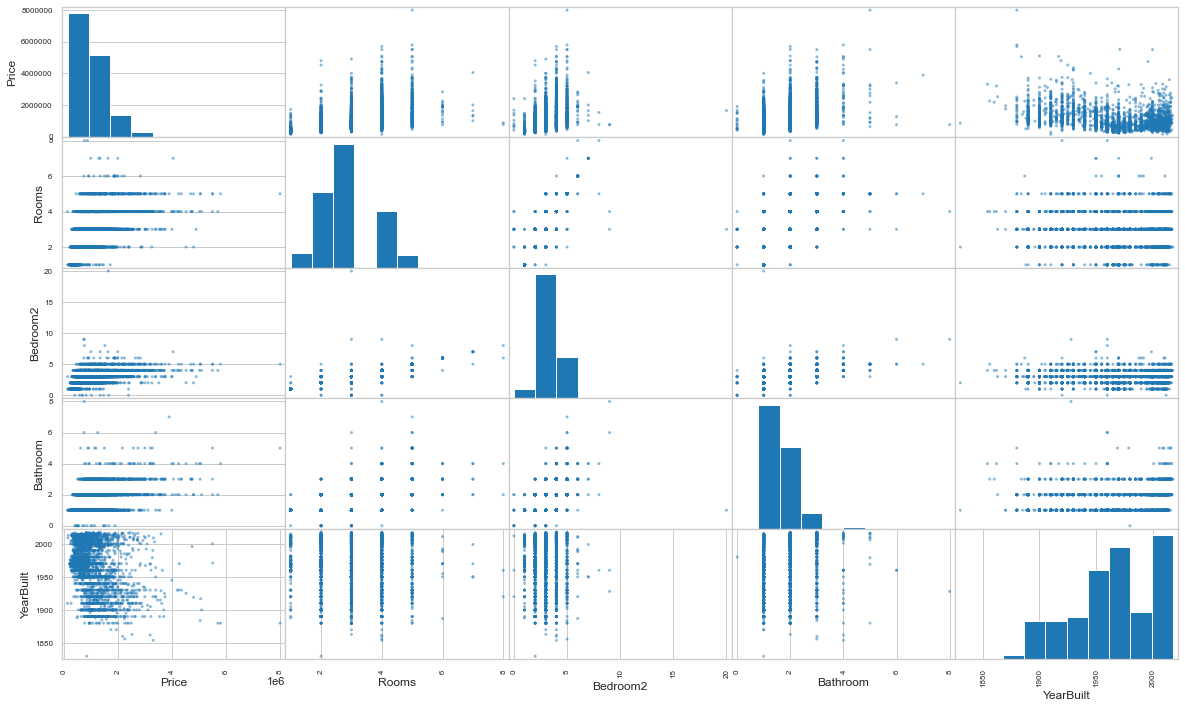

In [81]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2","Bathroom",
              "YearBuilt"]
scatter_matrix(train_set[attributes], figsize=(20, 12))
plt.show()

In [82]:
councilarea=rnk_top10=train_set.groupby(['CouncilArea']).mean().sort_values(ascending=False, by="Price").head(10).reset_index()
councilarea

,CouncilArea,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,Bayside,3.160428,1.661414e+06,12.202674,3.144385,1.860963,1.823529,440.689840,197.754987,1964.970874,-37.924188,145.009479,7713.973262
1,Boroondara,3.107071,1.638216e+06,7.703030,3.052525,1.741414,1.753535,693.658586,188.354733,1957.816393,-37.822013,145.062487,8074.876768
2,Stonnington,2.475352,1.339017e+06,6.060915,2.457746,1.531690,1.419014,620.978873,126.639173,1959.379518,-37.853250,145.019209,8724.052817
3,Unavailable,3.000000,1.325000e+06,13.800000,3.000000,1.000000,2.000000,400.000000,NaN,NaN,-37.934340,145.008160,5454.000000
4,Manningham,3.610169,1.223411e+06,13.405085,3.610169,1.923729,1.906780,617.644068,287.639344,1978.929577,-37.775768,145.120249,7151.398305
5,Whitehorse,3.289855,1.220872e+06,13.109420,3.260870,1.630435,1.630435,510.500000,164.069825,1967.034091,-37.832090,145.136077,4909.855072
6,Monash,3.272000,1.164134e+06,14.394400,3.256000,1.592000,1.880000,555.744000,153.083699,1968.128205,-37.896413,145.115076,6049.688000
7,Yarra,2.381132,1.137771e+06,2.800377,2.373585,1.369811,0.830189,391.011321,127.677124,1948.911243,-37.804154,144.992076,7976.011321
8,Port Phillip,2.280851,1.133982e+06,5.029362,2.276596,1.408511,1.063830,364.314894,104.908661,1955.226415,-37.856618,144.970334,8146.629787
9,Glen Eira,2.772861,1.044102e+06,11.661357,2.769912,1.460177,1.646018,438.884956,147.261850,1971.482927,-37.903699,145.049683,7091.657817


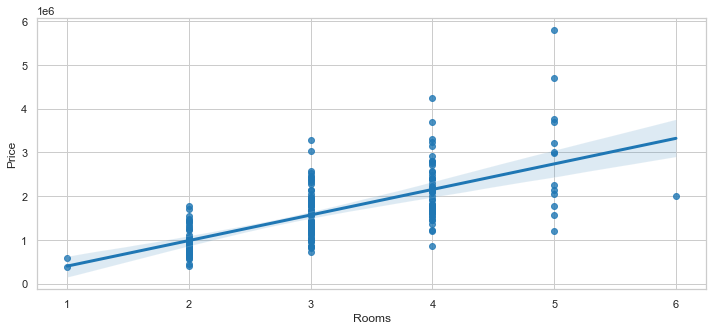

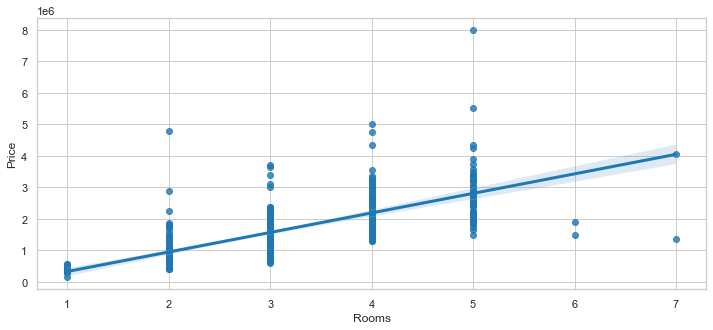

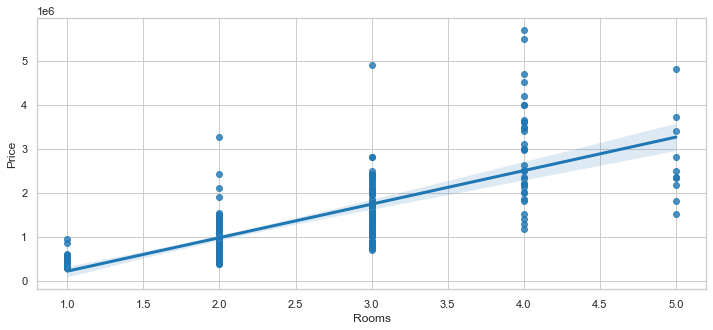

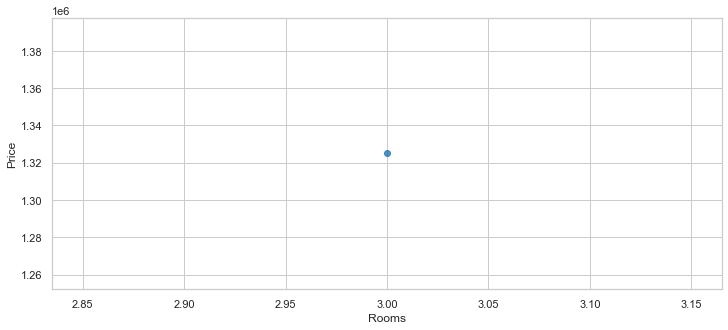

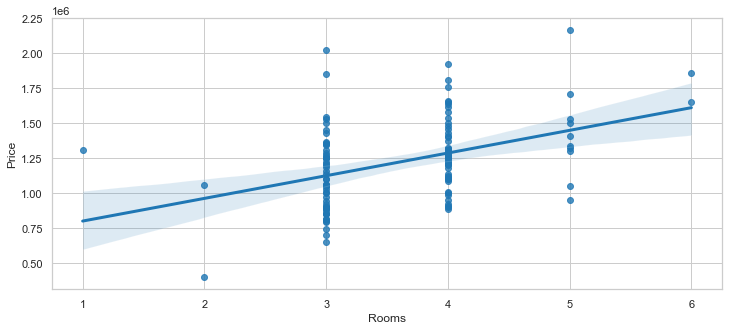

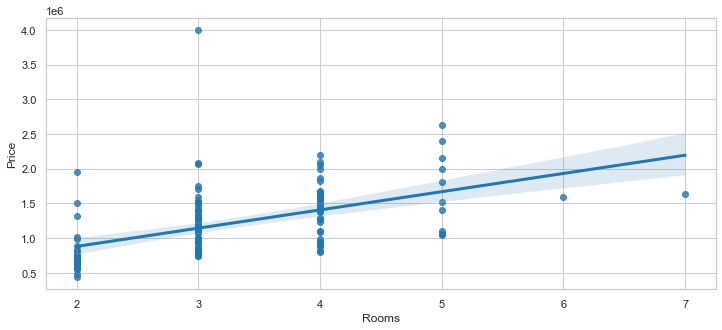

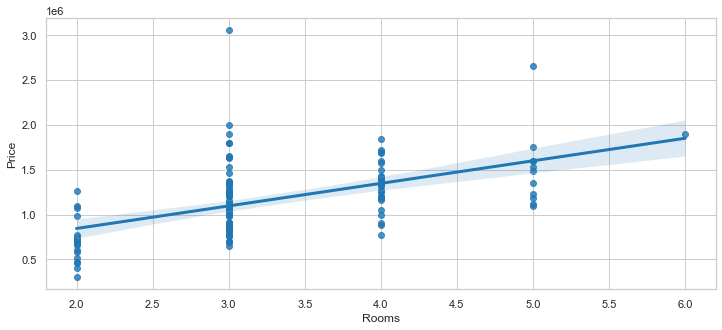

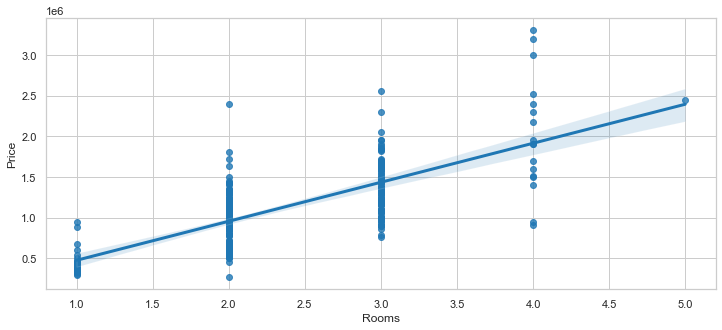

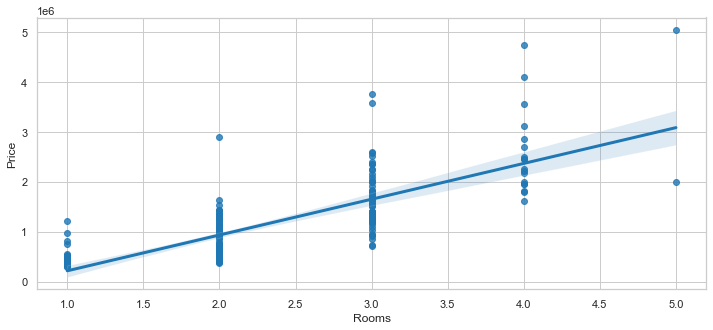

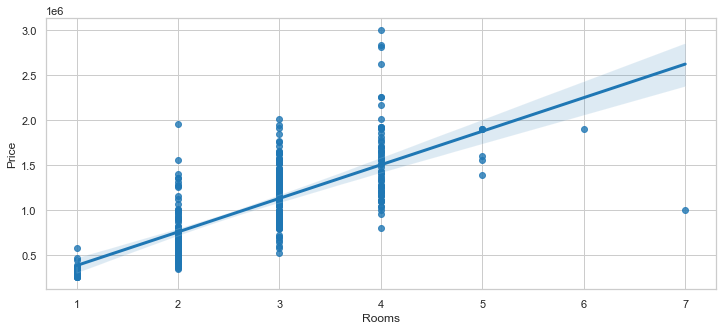

In [83]:
for area in councilarea.CouncilArea:
    sns.regplot(data=train_set[train_set.CouncilArea==area], x="Rooms", y="Price", label=area)
    plt.show()

In [84]:
train_set.groupby(["CouncilArea","Suburb"]).mean().sort_values(ascending=[True,False], by=["CouncilArea","Price"])

Rooms         Price   Distance  Bedroom2  \
CouncilArea  Suburb                                                        
Banyule      Eaglemont       3.444444  1.915111e+06  10.144444  3.111111   
             Ivanhoe East    2.600000  1.545600e+06   8.520000  2.600000   
             Ivanhoe         2.975000  1.207125e+06   7.882500  2.950000   
             St Helena       4.000000  1.096000e+06  16.100000  4.000000   
             Montmorency     3.000000  1.017500e+06  16.200000  3.000000   
...                               ...           ...        ...       ...   
Yarra        Collingwood     2.160000  9.257000e+05   1.680000  2.120000   
             Fairfield       1.500000  4.880000e+05   5.800000  1.500000   
Yarra Ranges Chirnside Park  4.000000  9.119820e+05  27.100000  4.000000   
             Mooroolbark     3.600000  7.628000e+05  26.500000  3.600000   
             Healesville     3.000000  6.500000e+05  45.200000  3.000000   

                             Bathroom       Car     Landsize  BuildingArea  \
CouncilArea  Suburb                                                          
Banyule      Eaglemont       1.888889  1.777778   873.888889    223.166667   
             Ivanhoe East    1.600000  1.400000   507.200000    189.000000   
             Ivanhoe         1.550000  1.450000   432.600000    188.421053   
             St Helena       2.000000  1.500000  1139.000000    370.000000   
             Montmorency     2.000000  1.750000   656.000000    157.000000   
...                               ...       ...          ...           ...   
Yarra        Collingwood     1.280000  0.840000   809.800000     93.777778   
             Fairfield       1.000000  1.000000     0.000000     87.000000   
Yarra Ranges Chirnside Park  2.000000  3.000000   734.000000    222.000000   
             Mooroolbark     1.600000  2.600000   993.200000    144.375000   
             Healesville     2.000000  4.000000   724.000000    156.600000   

                               YearBuilt  Lattitude  Longtitude  Propertycount  
CouncilArea  Suburb                                                             
Banyule      Eaglemont       1951.428571 -37.763030  145.059839         1651.0  
             Ivanhoe East    1959.333333 -37.773102  145.055878         1554.0  
             Ivanhoe         1972.961538 -37.766329  145.040818         5549.0  
             St Helena       2005.000000 -37.689490  145.134245          915.0  
             Montmorency     2006.500000 -37.720905  145.122447         3891.0  
...                                  ...        ...         ...            ...  
Yarra        Collingwood     1930.526316 -37.800209  144.988366         4553.0  
             Fairfield       2002.000000 -37.784300  145.014000         2970.0  
Yarra Ranges Chirnside Park  1996.000000 -37.760320  145.302990         3789.0  
             Mooroolbark     1975.000000 -37.787828  145.322110         8280.0  
             Healesville     2009.000000 -37.646850  145.526350         3307.0  

[297 rows x 12 columns]

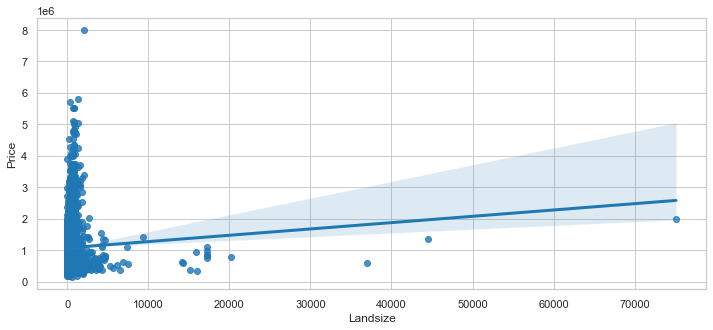

In [85]:
## Plot landsize vs Price
sns.regplot(data=train_set, x="Landsize", y="Price")
plt.show()

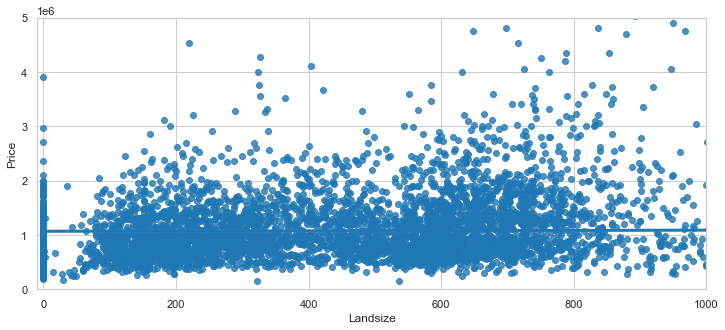

In [86]:
sns.regplot(data=train_set, x="Landsize", y="Price")
plt.axis([-10, 1000, 0, 5e6])
plt.show()

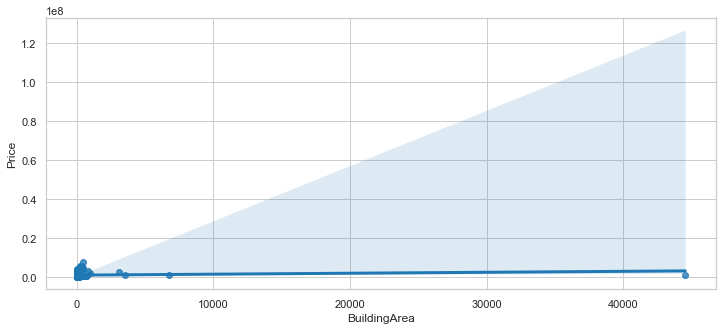

In [87]:
## Let's see BuildingArea
sns.regplot(data=train_set, x="BuildingArea", y="Price")
plt.show()

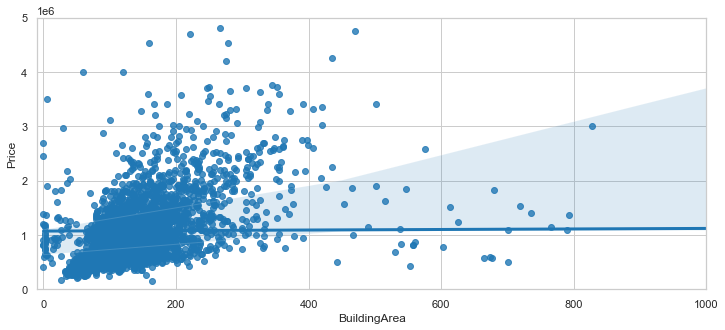

In [88]:
sns.regplot(data=train_set, x="BuildingArea", y="Price",)
plt.axis([-10, 1000, 0, 5e6])
plt.show()

In [89]:
## Now there is no 0 but NaNs.. NaNs are not displayed, neither taked into account to estimate the fit
train_set[['Price','Landsize','BuildingArea']].head(10)

,Price,Landsize,BuildingArea
index,,,
0,1380000.0,766.0,NaN
1,1100000.0,189.0,NaN
2,1480000.0,605.0,116.0
3,1055000.0,324.0,NaN
4,1000000.0,728.0,164.0
5,650000.0,136.0,81.0
6,1510000.0,370.0,NaN
7,600000.0,204.0,124.0
8,1260000.0,654.0,150.0


In [90]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,id
index,,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan,144867.75405000005241 Buckley St
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan,144954.623367 Charles St
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan,145031.8049000000242 Maud St
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan,144920.8346999999813 Percy St
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan,145064.932253 Thompsons Rd


It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html

Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased) Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

In [91]:
import datetime
format_str = '%d/%m/%Y' # The format
tr_dateformat = train_set.copy()
tr_dateformat["Year"]=[datetime.datetime.strptime(d, format_str).date().year for d in tr_dateformat.Date]
tr_dateformat["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in tr_dateformat.Date]
tr_dateformat["YearMonth"]=[str(y)+ "-" + str(m).zfill(2) for y,m in zip(tr_dateformat.Year,tr_dateformat.Month)]
tr_dateformat["YearMonth"]

index
0       2017-08
1       2017-05
2       2016-10
3       2016-05
4       2016-08
         ...   
5427    2016-08
5428    2017-08
5429    2016-08
5430    2016-04
5431    2016-07
Name: YearMonth, Length: 5432, dtype: object

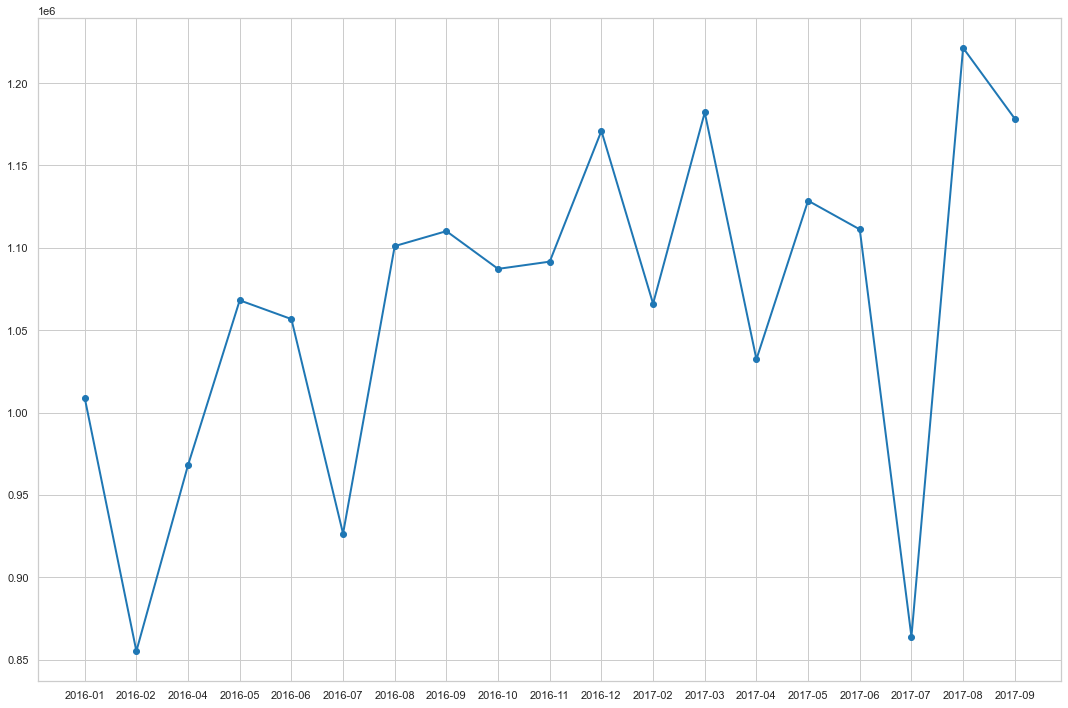

In [92]:
fig = plt.figure(figsize=(15,10))
values= tr_dateformat.groupby("YearMonth")["Price"].mean()
plt.plot(values,marker="o")


fig.tight_layout()

## Prepare the data for Machine Learning algorithms

In [93]:
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)]
print(train_set.shape[0],sample_incomplete_rows.shape[0])
sample_incomplete_rows.head()

5432 2936


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
index,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,144867.75405000005241 Buckley St
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,144954.623367 Charles St
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,144920.8346999999813 Percy St
6,Glen Iris,27 Pascoe St,3,h,1510000.0,PI,hockingstuart,10/09/2016,9.2,3146.0,3.0,2.0,2.0,370.0,NaN,NaN,Boroondara,-37.85970,145.08830,Southern Metropolitan,10412.0,145050.4403000000227 Pascoe St
9,Sunshine West,26 Bell St,4,h,645400.0,S,Barry,7/11/2016,13.5,3020.0,4.0,2.0,3.0,765.0,NaN,NaN,Brimbank,-37.78600,144.81500,Western Metropolitan,6763.0,144777.21426 Bell St


In [94]:
train_set.columns[train_set.isna().any()].tolist()

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

In [95]:
train_set.columns[train_set.isnull().any()].tolist()

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

In [96]:
train_set.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                25
Landsize            0
BuildingArea     2542
YearBuilt        2130
CouncilArea       553
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
id                  0
dtype: int64

In [97]:
## option 3 : Set values to some values
train_set_persuburb=train_set.groupby(["Suburb"]).median().reset_index()[["Suburb","BuildingArea"]]
train_set_persuburb.head()

,Suburb,BuildingArea
0,Abbotsford,114.0
1,Aberfeldie,136.0
2,Airport West,130.0
3,Albanvale,120.0
4,Albert Park,122.5


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BuildingArea'>

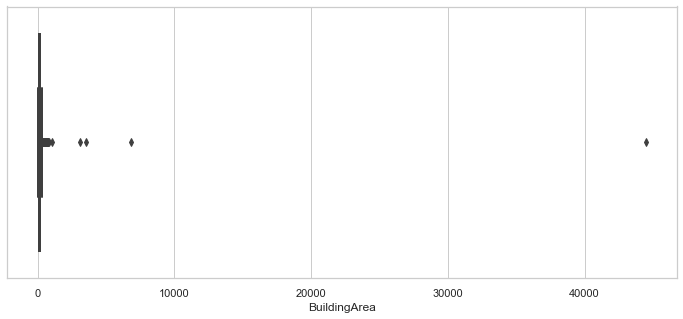

In [98]:
sns.boxplot(train_set.BuildingArea) # According to the chart, we will use the median
# sns.distplot(train_set.BuildingArea)

In [99]:
train_set_persuburb[train_set_persuburb.BuildingArea.isna()]

,Suburb,BuildingArea
8,Altona Meadows,NaN
10,Ardeer,NaN
16,Aspendale Gardens,NaN
17,Attwood,NaN
24,Beaumaris,NaN
36,Briar Hill,NaN
40,Brooklyn,NaN
51,Cairnlea,NaN
61,Caulfield,NaN
62,Caulfield East,NaN


In [100]:
## option 3 : Set values to some values
median = train_set["YearBuilt"].median()
train_set_persuburb=train_set.groupby(["Suburb"]).median().reset_index()[["Suburb","YearBuilt"]]
train_set_persuburb

,Suburb,YearBuilt
0,Abbotsford,1900.0
1,Aberfeldie,1980.0
2,Airport West,1985.0
3,Albanvale,1980.0
4,Albert Park,1900.0
...,...,...
287,Windsor,1982.5
288,Wollert,2012.0
289,Wyndham Vale,1997.5
290,Yallambie,1976.5


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

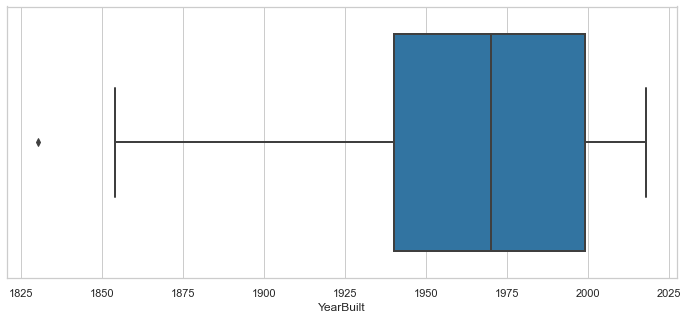

In [101]:
sns.boxplot(train_set.YearBuilt)

In [102]:
train_set['YearBuilt'] = train_set['YearBuilt'].fillna(train_set.groupby('Suburb')['YearBuilt'].transform('median'))
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
index,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,1980.0,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,144867.75405000005241 Buckley St
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,1925.0,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,144954.623367 Charles St
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,145031.8049000000242 Maud St
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,144920.8346999999813 Percy St
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,145064.932253 Thompsons Rd


In [103]:
train_set_persuburb[train_set_persuburb.YearBuilt.isna()].head()

,Suburb,YearBuilt
10,Ardeer,NaN
16,Aspendale Gardens,NaN
17,Attwood,NaN
24,Beaumaris,NaN
36,Briar Hill,NaN


### Categorical data

Now let's preprocess the categorical input feature, CouncilArea:

In [104]:
train_set_cat = train_set[["CouncilArea"]]
# There is missing values in this category, we will create a new cateogry for those.
train_set_cat.fillna('Unknown').head(10)

,CouncilArea
index,
0,Moonee Valley
1,Darebin
2,Boroondara
3,Moreland
4,Manningham
5,Moreland
6,Boroondara
7,Moreland
8,Darebin


In [105]:
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
index,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,1980.0,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,144867.75405000005241 Buckley St
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,1925.0,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,144954.623367 Charles St
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,145031.8049000000242 Maud St
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,144920.8346999999813 Percy St
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,145064.932253 Thompsons Rd


In [106]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,id
index,,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan,144867.75405000005241 Buckley St
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan,144954.623367 Charles St
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan,145031.8049000000242 Maud St
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan,144920.8346999999813 Percy St
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan,145064.932253 Thompsons Rd


In [107]:
import datetime
def preprocessing(dt):
    dt=dt[dt.Bedroom2<=19]
    dt["Street"]=[d for d in dt.Address]
    dt["Street"]=dt["Street"].str.replace('\d+', '')
    dt["Street"]=dt["Street"].str.replace('\/+', '')
    dt["Street"]=dt["Street"].str.strip()
    
    format_str = '%d/%m/%Y' # The format
    dt["Year"]=[datetime.datetime.strptime(d, format_str).date().year for d in dt.Date]
    dt["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in dt.Date]
    dt["YearMonth"]=[str(y)+ "-" + str(m).zfill(2) for y,m in zip(dt.Year,dt.Month)]
    
    #drop columns which we won't be using
#     dt.drop('Address', axis=1, inplace=True)
#     dt.drop('Postcode', axis=1, inplace=True)
    
    #these two ones are preliminary
#     df.drop('BuildingArea', axis=1, inplace=True)
#     df.drop('YearBuilt', axis=1, inplace=True)
#     df.drop('Date', axis=1, inplace=True)

    return dt

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
Rooms_ix, Bedroom2_ix, Bathroom_ix, BuildingArea_ix = 0, 1, 2, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_building_area = X[:, Rooms_ix] / (1.0 +X[:, BuildingArea_ix])# add 1 to avoid 0 division
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, Bedroom2_ix] / (1.0 + X[:, Bathroom_ix]) # add 1 to avoid 0 division
            return np.c_[X, rooms_per_building_area, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_building_area]

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## Se crea un Pipeline el cual permite hacer una transformacion de los datos o de las columnas que quiero cambiar. En este caso 
## es cambiar los 0 a Nan y transformar los datos

## create a function to replace 0 by NaN
def replace_0_2_NaN(data):
    data[data == 0] = np.nan
    return data

def replace_NaN_median(data):
    data['YearBuilt'] = data['YearBuilt'].fillna(train_set.groupby('Suburb')['YearBuilt'].transform('median'))
    data['BuildingArea'] = data['BuildingArea'].fillna(train_set.groupby('Suburb')['BuildingArea'].transform('median'))
    return data


num0_pipeline = Pipeline([
        ('zeros2NaN',FunctionTransformer(func = replace_0_2_NaN,validate=False)),
        ('nan2MedianperCat',FunctionTransformer(func = replace_NaN_median,validate=False)),
        ('imputer', SimpleImputer(strategy="median")),
        ('log',FunctionTransformer(np.log1p, validate=True)),
        ('std_scaler', StandardScaler()),
    ])

In [110]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [111]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

In [112]:
from category_encoders import TargetEncoder
cat_pipeline_target = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_target_encoder', TargetEncoder(min_samples_leaf=20, smoothing=5)),
    ])

In [113]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.494941
Bedroom2         0.460544
Bathroom         0.459137
Car              0.227902
Longtitude       0.199303
BuildingArea     0.061963
Landsize         0.048182
Propertycount   -0.038241
Distance        -0.167654
Lattitude       -0.206769
YearBuilt       -0.352157
Name: Price, dtype: float64

In [114]:
from sklearn.compose import ColumnTransformer

## Review before to remove : Suburb, Address, Postcode
## Consider new types in Test: Rooms, SellerG
## Review : Landsize, BuildingArea
## Type One-Hot / Method One-Hot / Regionname One-Hot / YearMonth One-hot
## SellerG Target-Encode / Postcode Target-Encode / AddressStreet Edit Target-Encode / Suburb Target-Encode / CouncilArea

train_set_num = train_set.select_dtypes(include=[np.number])
num_attribs0 = ['BuildingArea','YearBuilt']
num_attribs1 = list(train_set_num[["Rooms","Bedroom2","Bathroom","BuildingArea","Car","Distance","Longtitude","Lattitude"]])
cat_attribs_onehot = ["Type",'Method','Regionname','YearMonth']
cat_attribs_targetenc = ['SellerG','Suburb', 'CouncilArea', "Street"]


full_pipeline = ColumnTransformer([
        ("num0", num0_pipeline, num_attribs0),
        ("num1", num_pipeline, num_attribs1),
        ("cat", cat_pipeline, cat_attribs_onehot),
        ("cat1", cat_pipeline_target, cat_attribs_targetenc),
    
    ])

tr_set=preprocessing(train_set)
housing_labels = tr_set["Price"].copy()
housing_prepared = full_pipeline.fit_transform(tr_set,y=housing_labels)
# tr_set = tr_set.drop("Price", axis=1) # drop labels for training set
housing_prepared

C:\Users\Anderson\AppData\Local\Temp\ipykernel_30092\4036438015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Street"]=[d for d in dt.Address]
C:\Users\Anderson\AppData\Local\Temp\ipykernel_30092\4036438015.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dt["Street"]=dt["Street"].str.replace('\d+', '')
C:\Users\Anderson\AppData\Local\Temp\ipykernel_30092\4036438015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Street"]=dt["Street"].st

array([[ 1.42616127e-01,  4.88011878e-01,  1.11643574e+00, ...,
         1.17734358e+06,  9.82980531e+05,  1.05785272e+06],
       [-1.31516100e-01, -1.28560324e+00, -9.84521471e-01, ...,
         1.20408123e+06,  9.03235388e+05,  1.12711913e+06],
       [-1.83900959e-01, -4.73218720e-01,  6.59571359e-02, ...,
         1.69349837e+06,  1.63821604e+06,  1.07602946e+06],
       ...,
       [-7.26756599e-01,  9.00032716e-01,  6.59571359e-02, ...,
         1.00845575e+06,  1.13777079e+06,  1.07836430e+06],
       [-9.70460463e-01,  1.27798239e+00, -9.84521471e-01, ...,
         1.09256731e+06,  1.04230917e+06,  1.07836430e+06],
       [ 3.02414844e-01, -1.51175980e-01,  6.59571359e-02, ...,
         7.50814717e+05,  8.17496215e+05,  1.07235699e+06]])

In [115]:
seed = 1
columns_train=["Rooms","Distance","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"]
# columns_train=["NB"]
train_data = train_set[columns_train].fillna(0)

dt = [train_data.apply(lambda x: [x.Rooms,x.Distance,x.Bedroom2,x.Bathroom,x.Car,x.Landsize,x.BuildingArea,x.YearBuilt,x.Lattitude,x.Longtitude,x.Propertycount], axis=1)]
# dt = [train_data.apply(lambda x: [x.NB], axis=1)]
target = np.array(train_set.Price) #target
data_matrix = []
for data in dt[0]:
    data_array=np.array(data)
    data_matrix.append(data_array)

data_matrix= np.array(data_matrix)

In [116]:
X,y = data_matrix, target # Create X matrix and y vector from the dataset.
features = columns_train
print('feature names: {}'.format(columns_train))
print('Shape of data: {} {}'.format(X.shape, y.shape))

feature names: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Shape of data: (5432, 11) (5432,)


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (4345, 11) (1087, 11)
Train and test sizes of y: (4345,) (1087,)


In [118]:
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting


# Regrerssion coefs
coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()

# Prediction
y_test_pred = lr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2score = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score))


Intercept and coefs:
-197130972.9260698 [ 3.01137870e+05 -4.48381020e+04  7.12779196e+03  1.71024494e+05
  6.14173208e+04  1.51992456e+01  2.84075893e+01 -7.88380975e+01
 -1.56441562e+06  9.54539350e+05 -1.56783971e+00]

MSE: 218166008370.64114
R^2 Score: 0.46846274674000576


<AxesSubplot:title={'center':'Model Coefficients'}>

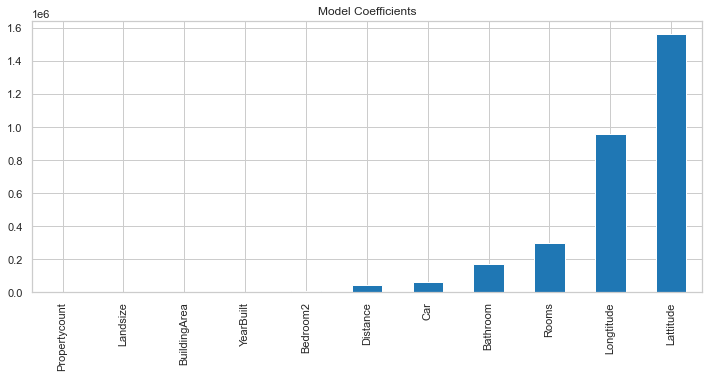

In [119]:
coefs_lr.plot(kind='bar', title='Model Coefficients')

# Anderson code end

## Select and train a model

### Linear Regression

In [120]:
housing_labels

index
0       1380000.0
1       1100000.0
2       1480000.0
3       1055000.0
4       1000000.0
          ...    
5427     851500.0
5428    1400000.0
5429     975000.0
5430     722000.0
5431     860000.0
Name: Price, Length: 5431, dtype: float64

In [121]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [122]:
# let's try the full preprocessing pipeline on a few training instances
some_data = tr_set.iloc[:25]
some_labels = housing_labels.iloc[:25]
some_data.drop("Price", axis=1)
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1291104.13868265 1355580.90644844 1660026.7771976  1081402.28667366
 1507140.37625818  378295.73846694 1660205.72412669  377297.04395339
 1407319.86397166  870328.41499029  873888.5660958  1666617.58064105
  976940.33337261  641809.8011005  1085818.61971245  976862.33139437
 1984160.98874484  938714.11466132 1158422.18855083  888785.40649972
 1170519.01215439 1853673.96919646  439845.7441652   702837.88904465
 1181875.67958114]


In [123]:
print("Labels:", list(some_labels))

Labels: [1380000.0, 1100000.0, 1480000.0, 1055000.0, 1000000.0, 650000.0, 1510000.0, 600000.0, 1260000.0, 645400.0, 870000.0, 1135000.0, 770000.0, 785000.0, 752000.0, 890000.0, 1405000.0, 651000.0, 871500.0, 572500.0, 865000.0, 3260000.0, 450000.0, 525000.0, 880000.0]


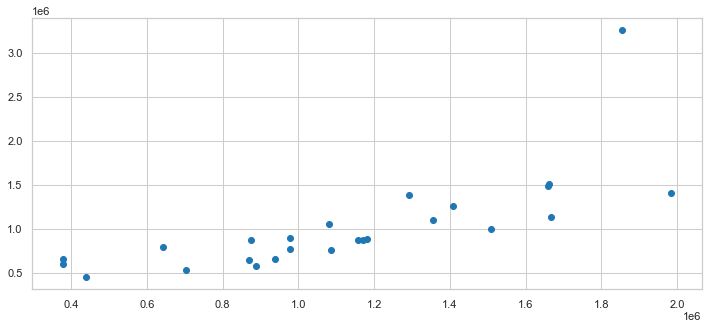

In [124]:
plt.scatter(lin_reg.predict(some_data_prepared),list(some_labels))

----- EVALUATION ON TRAIN SET ------
RMSE 364857.3221605887
R^2:  0.6820109728346991


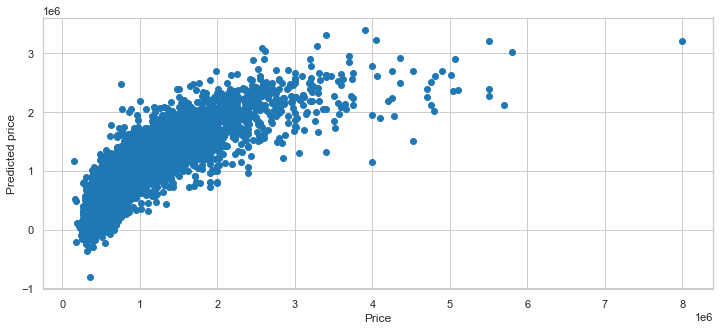

In [125]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",lin_rmse)
print("R^2: ",r2_score(housing_labels, housing_predictions))

y = housing_labels
y_pred=housing_predictions
plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show() #364857.3221605887

In [126]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

241139.97770716107

### K-Nearest Neighbour

In [127]:
from sklearn import neighbors

n_neighbors = 3
knn_reg = neighbors.KNeighborsRegressor(n_neighbors)
knn_reg.fit(housing_prepared, housing_labels)

KNeighborsRegressor(n_neighbors=3)

----- EVALUATION ON TRAIN SET ------
RMSE 366537.02525609743
R^2:  0.6790763646563802


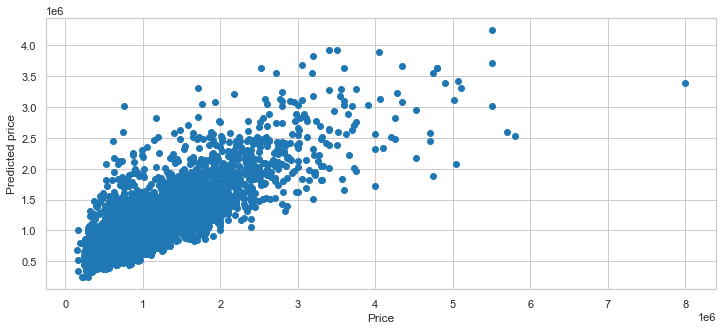

In [128]:
housing_predictions = knn_reg.predict(housing_prepared)
knn_mse = mean_squared_error(housing_labels, housing_predictions)
knn_rmse = np.sqrt(knn_mse)
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",knn_rmse)
print("R^2: ",r2_score(housing_labels, housing_predictions))

y = housing_labels
y_pred=housing_predictions
plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

 ## Final Model 
 Create Final Model and evaluate it (You shoud do this only once)

----- EVALUATION ON TRAIN SET ------
RMSE 364857.3221605887
R^2:  0.6820109728346991


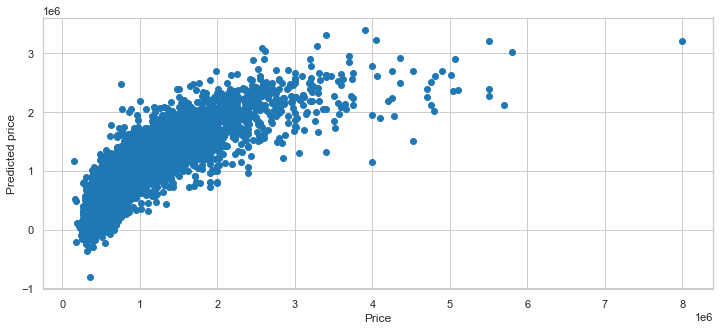

In [129]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",lin_rmse)
print("R^2: ",r2_score(housing_labels, housing_predictions))

y = housing_labels
y_pred=housing_predictions
plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

In [137]:
## predict the test set and generate the submission file

X_test = preprocessing(test_set)
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)
df_output = pd.DataFrame(final_predictions)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('baseline.csv',index=False)

C:\Users\Anderson\AppData\Local\Temp\ipykernel_30092\4036438015.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dt["Street"]=dt["Street"].str.replace('\d+', '')
C:\Users\Anderson\AppData\Local\Temp\ipykernel_30092\4036438015.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dt["Street"]=dt["Street"].str.replace('\/+', '')


In [138]:
len(final_predictions)

8148

# Prediction part


## EXERCICE - TRAIN A MODE, and upload your best solution to the Kaggle Challenge

Tasks: 
+ Clean and trasform the data
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


In [ ]:
## the features

## the model

## fit the model

## predict training set

## Evaluate the model and plot it

## predict the test set and generate the submission file

Explain the choosed model and why you think that is is the best:
